# Usuarios y permisos de Situ
Esto intenta ser un analisis de las realciones entre usuarios y permisos de situ a ver si del mismo se pude
llegar a una conclusion de perfiles necesitados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


## Se leen los archivos listados a continuacon que contienen la siguiente informacion
**usuario_permiso.csv** con las columnas:
* idusuario: entero que representa el identificador unico del usuario
* idpermiso: string que respresnta el identificador unico del permiso
* id: entero id de la tabla misma

**usuario_permiso_group.csv** con las columnas:
* idusuario: es el campo agrupador en este archivo,es igual que el anterior pero sin repetidos
* permisos: lista de idpermisos separada por comas
* cantidad: cantidad de permisos en la lista, o sea asociados al usuario



In [2]:
df_usuario_permiso = pd.read_csv(r"archivos/situ/usuario_permiso.csv", sep=';')
df_user_perm_grouped = pd.read_csv(r"archivos/situ/usuario_permiso_group.csv", sep=';')
print(df_usuario_permiso.head())
print(df_user_perm_grouped.head())

   idusuario            idpermiso  id
0          0             ABM_CAMA   1
1          0           ABM_SECTOR   2
2          0         ABM_SERVICIO   3
3          0  ADMINISTRAR_FERIADO   4
4          0     ALTA_CONSULTORIO   5
   idusuario                                           permisos  cantidad
0          0  ABM_CAMA, ABM_SECTOR, ABM_SERVICIO, ADMINISTRA...        43
1          4  ABM_CAMA, ABM_SECTOR, ABM_SERVICIO, ADMINISTRA...        43
2          5       INGRESAR_POSTIT_GENERAL, INTERNACION_ASIGNAR         2
3          6                                       CONSULTAR_HC         1
4          7                                       CONSULTAR_HC         1


In [3]:
print('Hay {} usuarios y {} permisos'.format( df_usuario_permiso['idusuario'].nunique(), df_usuario_permiso['idpermiso'].nunique() ))



Hay 526 usuarios y 43 permisos


In [4]:
df_user_perm_grouped.describe()

idusuario    cantidad
count  526.000000  526.000000
mean   268.188213    4.961977
std    152.475699    4.414099
min      0.000000    1.000000
25%    137.250000    4.000000
50%    268.500000    4.000000
75%    399.750000    4.000000
max    531.000000   43.000000

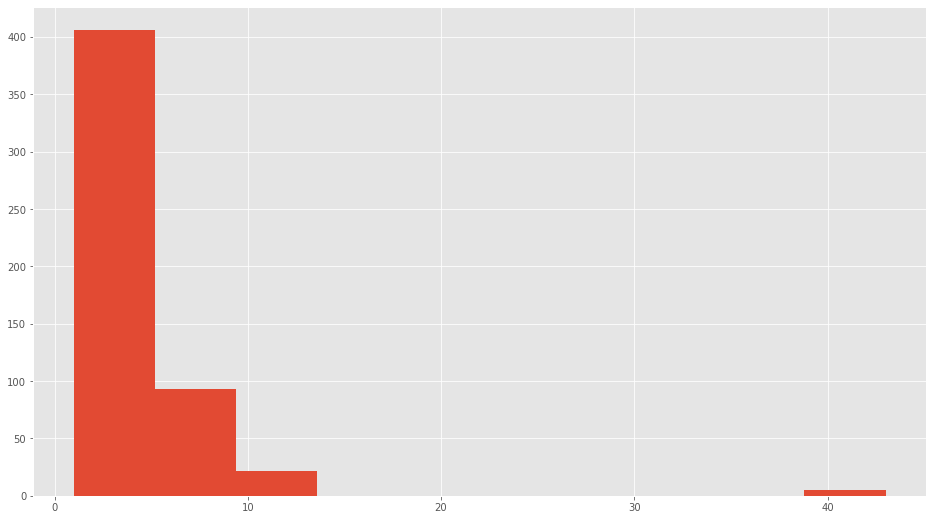

In [27]:
df_user_perm_grouped['cantidad'].hist()
plt.show()

In [10]:
df_usuario_permiso.loc[100][:2]
from functools import reduce
def mi_concatenar(series):
       return reduce(lambda x, y: x +',' + y, series)

In [11]:
df_usuario_permiso_user_group = (df_usuario_permiso.drop(['id'], axis=1)).copy(deep=True)
#df_usuario_permiso_user_group = df_usuario_permiso_user_group.groupby('idusuario')['idpermiso'].count()
df_usuario_permiso_user_group = df_usuario_permiso_user_group.groupby('idusuario').agg({"idpermiso":[mi_concatenar, np.size]})
#df_usuario_permiso_user_group = df_usuario_permiso_user_group.groupby('idusuario')


In [27]:
df_usuario_permiso_user_group.head()
#df_usuario_permiso_user_group.groupby(('idpermiso', 'mi_concatenar'))


idpermiso     
                                               mi_concatenar size
idusuario                                                        
0          ABM_CAMA,ABM_SECTOR,ABM_SERVICIO,ADMINISTRAR_F...   43
4          ABM_CAMA,ABM_SECTOR,ABM_SERVICIO,ADMINISTRAR_F...   43
5                INGRESAR_POSTIT_GENERAL,INTERNACION_ASIGNAR    2
6                                               CONSULTAR_HC    1
7                                               CONSULTAR_HC    1

In [23]:
df_usuario_permiso_user_group['idpermiso']['mi_concatenar']

idusuario
0      ABM_CAMA,ABM_SECTOR,ABM_SERVICIO,ADMINISTRAR_F...
4      ABM_CAMA,ABM_SECTOR,ABM_SERVICIO,ADMINISTRAR_F...
5            INGRESAR_POSTIT_GENERAL,INTERNACION_ASIGNAR
6                                           CONSULTAR_HC
7                                           CONSULTAR_HC
                             ...                        
527    CONSULTAR_HC,DEMANDA_ATENCION,INTERNACION,PROG...
528    CONSULTAR_HC,DEMANDA_ATENCION,INTERNACION,PROG...
529    CONSULTAR_HC,DEMANDA_ASIGNAR,INTERNACION,INTER...
530    CONSULTAR_HC,DEMANDA_ASIGNAR,INTERNACION,PROGR...
531    CONSULTAR_HC,DEMANDA_ATENCION,INTERNACION,PROG...
Name: mi_concatenar, Length: 526, dtype: object

In [24]:
df_user_perm_grouped_grouped = (df_user_perm_grouped).copy(deep=True)
df_user_perm_grouped_grouped = df_user_perm_grouped_grouped.groupby('permisos').agg({"idusuario":np.size, "cantidad": np.max})

In [25]:
df_user_perm_grouped_grouped.sort_values(by='idusuario', ascending=False)

idusuario  cantidad
permisos                                                               
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION, PR...        310         4
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, INT...         58         9
INGRESAR_POSTIT_GENERAL                                    34         1
CONSULTAR_HC                                               33         1
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, INT...          7        10
CONSULTAR_HC, DEMANDA_ATENCION, INGRESAR_POSTIT...          6         6
INTERNACION                                                 5         1
CERRAR_FORMULARIO, CONSULTAR_HC, CONTROL_FORMUL...          5        12
CONSULTAR_HC, INTERNACION, INTERNACION_LISTADO,...          5         6
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, INT...          5         9
CONSULTAR_HC, INTERNACION                                   4         2
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, INT...          4         8
CONSULTAR_HC, DEMANDA_ATENCION, PROGRAMADO_ATEN...          3         3
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, PAC...          3         7
MENU_FACTURACION                                            3         1
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION, IN...          2         5
CONSULTAR_HC, INTERNACION, INTERNACION_LISTADO              2         3
CONSULTAR_HC, INTERNACION, INTERNACION_LISTADO,...          2         4
ABM_CAMA, ABM_SECTOR, ABM_SERVICIO, ADMINISTRAR...          2        43
CONSULTAR_HC, DEMANDA_ATENCION, INGRESAR_POSTIT...          2         7
ABM_CAMA, ABM_SECTOR, ABM_SERVICIO, ADMINISTRAR...          2        40
CONSULTAR_HC, CONTROL_FORMULARIO, DEMANDA_ASIGN...          2        10
CONSULTAR_HC, DEMANDA_ASIGNAR, DEMANDA_ATENCION...          2         9
CONSULTAR_HC, DEMANDA_ASIGNAR, DEMANDA_ATENCION...          2        10
CONSULTAR_HC, IMPRIMIR_ANEXO2, INGRESAR_POSTIT_...          1         8
INGRESAR_POSTIT_GENERAL, INTERNACION_ASIGNAR                1         2
ABM_CAMA, ABM_SECTOR, DEMANDA_ASIGNAR, INTERNAC...          1        13
DEMANDA_ATENCION, PACIENTE_CREAR, PROGRAMADO_AS...          1         4
DEMANDA_ASIGNAR, PACIENTE_CREAR, PACIENTE_MODIF...          1         6
DEMANDA_ASIGNAR, PACIENTE_CREAR                             1         2
DEMANDA_ASIGNAR, DEMANDA_ATENCION, PACIENTE_CRE...          1         5
CONSULTAR_HC, DEMANDA_ASIGNAR, DEMANDA_ATENCION...          1        13
CONSULTAR_HC, DEMANDA_ASIGNAR, DEMANDA_ATENCION...          1        11
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, INT...          1        11
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION, PRO...          1         4
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION_ASI...          1         5
CONSULTAR_HC, DEMANDA_ASIGNAR, DEMANDA_ATENCION...          1         6
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION, IN...          1         5
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION, IN...          1         6
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION, IN...          1         8
CONSULTAR_HC, DEMANDA_ATENCION, INTERNACION, IN...          1         9
CONSULTAR_HC, DEMANDA_ATENCION, INGRESAR_POSTIT...          1         5
CONSULTAR_HC, DEMANDA_ASIGNAR, EDITAR_TURNEROS,...          1        10
ABM_CAMA, ABM_SECTOR, ABM_SERVICIO, ADMINISTRAR...          1        42
CONSULTAR_HC, DEMANDA_ASIGNAR, PACIENTE_CREAR, ...          1         6
CONSULTAR_HC, DEMANDA_ASIGNAR, INTERNACION_ASIG...          1         8
CONSULTAR_HC, DEMANDA_ASIGNAR, DEMANDA_ATENCION...          1        11